## *Matching Exercise*


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# import data
cps = pd.read_stata(
    "https://github.com/nickeubank/MIDS_Data/raw/master"
    "/Current_Population_Survey/cps_for_matching.dta"
)

In [2]:
# EDA
cps.head()

,index,annual_earnings,female,simplified_race,has_college,age,county,class94
0,151404,NaN,1,3.0,1,30,0-WV,"Private, For Profit"
1,123453,NaN,0,0.0,0,21,251-TX,"Private, For Profit"
2,187982,NaN,0,0.0,0,40,5-MA,"Self-Employed, Unincorporated"
3,122356,NaN,1,0.0,1,27,0-TN,"Private, Nonprofit"
4,210750,42900.0,1,0.0,0,52,0-IA,"Private, For Profit"


In [3]:
cps.describe() # we do have missing values on annual_earnings

,index,annual_earnings,female,simplified_race,has_college,age
count,11150.000000,5515.000000,11150.000000,11150.000000,11150.000000,11150.000000
mean,152259.915426,41818.028976,0.434439,0.630673,0.397937,43.296951
std,87584.443311,22930.578764,0.495705,1.019898,0.489494,13.327370
min,22.000000,2100.800000,0.000000,0.000000,0.000000,16.000000
25%,77102.000000,27040.000000,0.000000,0.000000,0.000000,32.000000
50%,152730.500000,35360.000000,0.000000,0.000000,0.000000,43.000000
75%,228309.250000,49400.000000,1.000000,1.000000,1.000000,54.000000
max,302307.000000,207979.200000,1.000000,3.000000,1.000000,85.000000


## Exercise 1
### Raw difference of annual_earnings between those with and without a college degree

In [4]:
# group by has_college variable and calculate the differnce in means
annual_earning_mean_table = cps.groupby("has_college").annual_earnings.mean()
annual_earning_mean_table

has_college
0    38865.668096
1    53024.163965
Name: annual_earnings, dtype: float64

In [5]:
# calculate the difference in means
annual_diff = annual_earning_mean_table[1] - annual_earning_mean_table[0]
print(f"""The raw difference of annual_earnings between those with"""
      +f""" and without a college degree (has_college) is ${annual_diff:.2f}.""")

# carry out t-test

# alpha sets to 0.05
alpha = 0.05

t_annual_diff, p_annual_diff = ttest_ind(
    cps[cps["has_college"] == 0]["annual_earnings"],
    cps[cps["has_college"] == 1]["annual_earnings"],
    nan_policy='omit'
)

print(f"t-statistic: {t_annual_diff:.2f}, p-value: {p_annual_diff:.5f}")

if p_annual_diff < alpha:
    print(
        f"""The difference in means is statistically significant"""
        + f""" with p-value being close to {p_annual_diff:.0f}"""
    )
else:
    print(
        f"""The difference in means is NOT statistically significant"""
        + f""" with p-value of {p_annual_diff:.2f}"""
    )


The raw difference of annual_earnings between those with and without a college degree (has_college) is $14158.50.
t-statistic: -19.24, p-value: 0.00000
The difference in means is statistically significant with p-value being close to 0


## Exercise 2
### Check the share of people in different racial groups who have college degrees.

In [6]:
# check for balance 
# create a crosstab of race and has_college
c_tab = pd.crosstab(cps["simplified_race"], cps["has_college"])
c_tab

has_college,0,1
simplified_race,,
0.0,4282,3340
1.0,696,324
2.0,1212,300
3.0,523,473


In [7]:
pd.crosstab(cps["simplified_race"], cps["has_college"], normalize="index")

has_college,0,1
simplified_race,,
0.0,0.561795,0.438205
1.0,0.682353,0.317647
2.0,0.801587,0.198413
3.0,0.525100,0.474900


In [8]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(c_tab)
if p < alpha:
    print(
        f"""The the share of people in different racial groups """
        +f"""who have college degrees is NOT balanced """
        + f"""\nSince the p-value is  {p:.2f}."""
        +f"""this difference is statistically significant."""
    )
else:
    print(
        f"""The the share of people in different racial groups """
        +f"""who have college degrees seem balanced. """
        + f"""\nWith the p-value of the chi-square test being {p:.5f},"""
        + f""" this difference is not statistically significant."""
    )


The the share of people in different racial groups who have college degrees is NOT balanced 
Since the p-value is  0.00.this difference is statistically significant.


In [9]:
county_check = pd.crosstab(cps["county"], cps["has_college"], normalize="index")
county_check

has_college,0,1
county,,
0-AK,0.676692,0.323308
0-AL,0.662857,0.337143
0-AR,0.701754,0.298246
0-AZ,0.285714,0.714286
0-CA,0.604545,0.395455
...,...,...
97-IL,0.480000,0.520000
99-CA,0.866667,0.133333
99-FL,0.416667,0.583333


* The the share of people in different racial groups who have college degrees is **not balanced**. With $p-value$ close to 0, the difference of the share of people in different racial groups who have college degrees is statistically significant. 

* Based on the table above, the distribution also looks different across counties. 

* Therefore, **the data seems imbalanced.**

## Exercise 3
### Plot a non-linear regression of annual_earnings on age

In [10]:
import altair as alt
alt.data_transformers.disable_max_rows()
#plot a non-linear regression of annual_earnings on age
# change the size of the plot
alt.renderers.set_embed_options(actions=False, width=600, height=400)
base = alt.Chart(
    cps,title = "Annual Earnings by Age").mark_point(
    color="blue").encode(
    x=alt.X("age", title="Age",scale=alt.Scale(zero=False)),
    y=alt.Y("annual_earnings", title="Annual Earnings", scale=alt.Scale(zero=False)),
    )
base.configure_axis(labelFontSize=20, titleFontSize=20)
fit = base.transform_loess("age", "annual_earnings").mark_line(color="red")
base + fit



alt.LayerChart(...)

* The relationship doesn't look linear. As age increases, the annual earning first increases then decreases a little bit.

* With matching, we don't have to go through the process of testing out different functional forms to see what fits the data best. Since for most cases, it's hard to know the true relationship between things that we are interested in, matching can save us a lot of time.

## Exercise 4
### Create a new variable for age

In [11]:
# Create a new variable that discretizes age into a single value for each decade of age
cps["decade"] = (cps["age"] // 10) * 10
cps["decade"].value_counts()
#include people who are 18 or 19 with the 20 year olds
cps["decade"] = cps["decade"].replace({10: 20})
# include people who are 80 or 90 with the 70 year olds
cps["decade"] = cps["decade"].replace({80: 70})
cps["decade"].value_counts()
cps["decade"] = cps["decade"].astype("category")

## Exercise 5
### Covert string variables into numeric variables

In [12]:
#convert county and class94 to a numeric vector of intergers.
cps['num_county'] = cps.county.astype('category').cat.codes
cps['num_class94'] = cps.class94.astype('category').cat.codes

## Exercise 6
### Drop variables

In [13]:
# drop the original age, county, and class94 variables, and missing values in annual_earnings
cps_new = cps.drop(columns=["age", "county", "class94","index"]).dropna().copy()
#reset the index
cps_new.reset_index(drop=True, inplace=True)

In [14]:
# check new data
cps_new.head()

,annual_earnings,female,simplified_race,has_college,decade,num_county,num_class94
0,42900.0,1,0.0,0,50,10,3
1,31200.0,0,2.0,0,30,31,3
2,20020.0,0,0.0,1,60,8,3
3,22859.2,0,0.0,0,40,44,1
4,73860.8,0,0.0,1,30,24,3


## Exercise 7
### Run DAME on your data

In [15]:
import dame_flame
model = dame_flame.matching.DAME(repeats=False, verbose=3, want_pe=True)
model.fit(
    cps_new,
    treatment_column_name="has_college",
    outcome_column_name="annual_earnings",
)
result = model.predict(cps_new)

Completed iteration 0 of matching
	Number of matched groups formed in total:  370
	Unmatched treated units:  644 out of a total of  1150 treated units
	Unmatched control units:  3187 out of a total of  4365 control units
	Number of matches made this iteration:  1684
	Number of matches made so far:  1684
	Covariates dropped so far:  set()
	Predictive error of covariate set used to match:  1199312680.0503805
Completed iteration 1 of matching
	Number of matched groups formed in total:  494
	Unmatched treated units:  25 out of a total of  1150 treated units
	Unmatched control units:  180 out of a total of  4365 control units
	Number of matches made this iteration:  3626
	Number of matches made so far:  5310
	Covariates dropped so far:  frozenset({'num_county'})
	Predictive error of covariate set used to match:  1199421883.0641599
Completed iteration 2 of matching
	Number of matched groups formed in total:  494
	Unmatched treated units:  25 out of a total of  1150 treated units
	Unmatched c

## Exercise 8
### Plot `pe` against iteration numbers.

* The match quality seems to fall off dramatically on **the third and the 7th iteration(iteration 1 and 6)**.

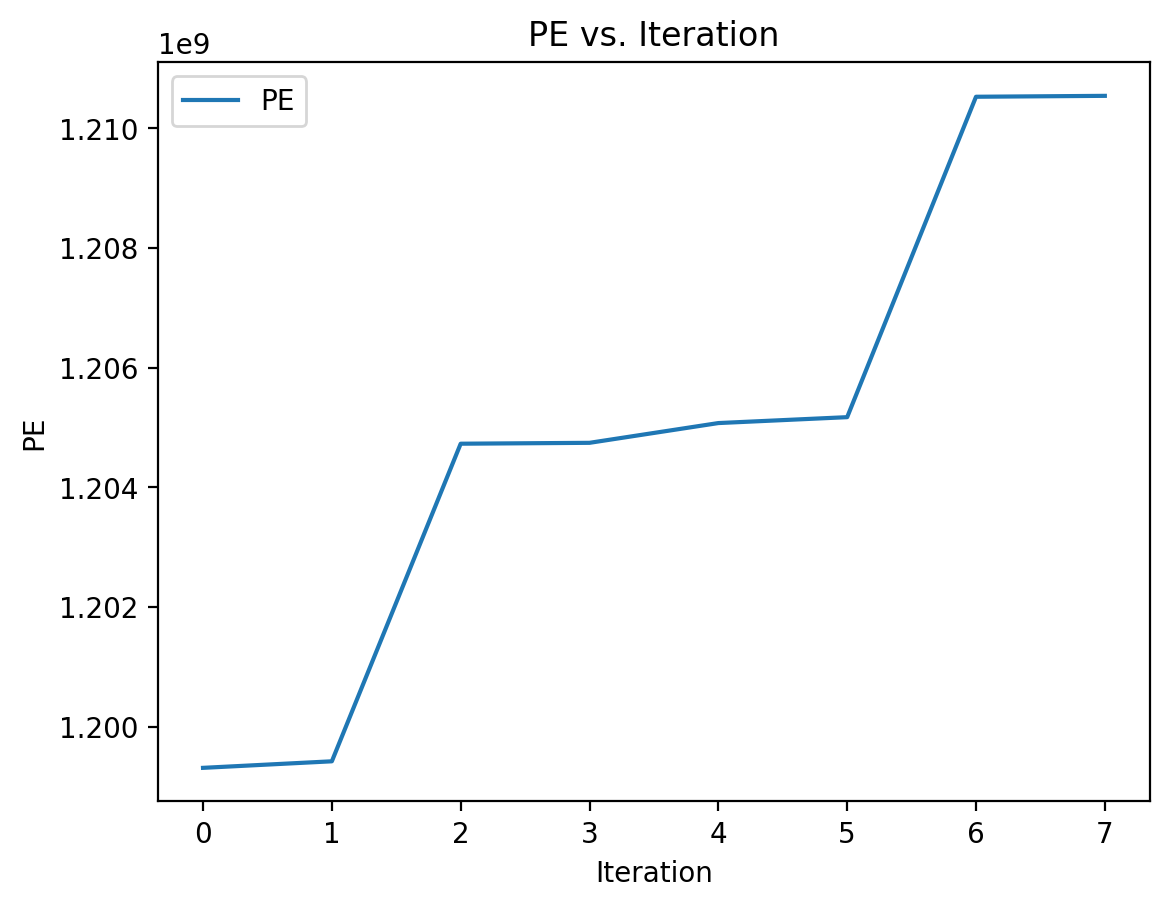

In [16]:
# plot pe against iteration
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
plt.plot(model.pe_each_iter, label="PE")
plt.xlabel("Iteration")
plt.ylabel("PE")
plt.title("PE vs. Iteration")
plt.legend()
plt.show()

## Exercise 9
* Since in Iteration 1(the second iteration), we already have `Number of matches made so far: 5310, with Covariates dropped so far:  frozenset({'num_county'})`, I might cut off the data at **iteration 1(the second iteration)** to get a sample size of at least that but before a big quality falloff

## Exercise 10
### Rerun matching with `early_stop_iterations`

In [17]:
model_new = dame_flame.matching.DAME(repeats=False, verbose=3, want_pe=True,early_stop_iterations=1)
model_new.fit(
    cps_new,
    treatment_column_name="has_college",
    outcome_column_name="annual_earnings",
)
result_new = model_new.predict(cps_new)

Completed iteration 0 of matching
	Number of matched groups formed in total:  370
	Unmatched treated units:  644 out of a total of  1150 treated units
	Unmatched control units:  3187 out of a total of  4365 control units
	Number of matches made this iteration:  1684
	Number of matches made so far:  1684
	Covariates dropped so far:  set()
	Predictive error of covariate set used to match:  1199312680.0503805
Completed iteration 1 of matching
	Number of matched groups formed in total:  494
	Unmatched treated units:  25 out of a total of  1150 treated units
	Unmatched control units:  180 out of a total of  4365 control units
	Number of matches made this iteration:  3626
	Number of matches made so far:  5310
	Covariates dropped so far:  frozenset({'num_county'})
	Predictive error of covariate set used to match:  1199421883.0641599
5310 units matched. We stopped after iteration 1


## Exercise 11
### Get back a dataset

In [18]:
def get_dataframe(model, result_of_fit):

    # Get original data
    better = model.input_data.loc[result_of_fit.index]
    if not better.index.is_unique:
        raise ValueError("Need index values in input data to be unique")

    # Get match groups for clustering
    better["match_group"] = np.nan
    better["match_group_size"] = np.nan
    for idx, group in enumerate(model.units_per_group):
        better.loc[group, "match_group"] = idx
        better.loc[group, "match_group_size"] = len(group)

    # Get weights. I THINK this is right?! At least for with repeat=False?
    t = model.treatment_column_name
    better["t_in_group"] = better.groupby("match_group")[t].transform(np.sum)

    # Make weights
    better["weights"] = np.nan
    better.loc[better[t] == 1, "weights"] = 1  # treaments are 1

    # Controls start as proportional to num of treatments
    # each observation is matched to.
    better.loc[better[t] == 0, "weights"] = better["t_in_group"] / (
        better["match_group_size"] - better["t_in_group"]
    )

    # Then re-normalize for num unique control observations.
    control_weights = better[better[t] == 0]["weights"].sum()

    num_control_obs = len(better[better[t] == 0].index.drop_duplicates())
    renormalization = num_control_obs / control_weights
    better.loc[better[t] == 0, "weights"] = (
        better.loc[better[t] == 0, "weights"] * renormalization
    )
    assert better.weights.notnull().all()

    better = better.drop(["t_in_group"], axis="columns")

    # Make sure right length and values!
    assert len(result_of_fit) == len(better)
    assert better.loc[better[t] == 0, "weights"].sum() == num_control_obs

    return better


In [19]:
match_df = get_dataframe(model_new, result_new)
match_df.head()

,annual_earnings,female,simplified_race,has_college,decade,num_county,num_class94,match_group,match_group_size,weights
0,42900.0,1,0.0,0,50,10,3,59.0,5.0,0.930000
1,31200.0,0,2.0,0,30,31,3,411.0,108.0,0.070189
2,20020.0,0,0.0,1,60,8,3,52.0,3.0,1.000000
3,22859.2,0,0.0,0,40,44,1,424.0,28.0,1.240000
4,73860.8,0,0.0,1,30,24,3,106.0,7.0,1.000000


## Exercise 12
### Check balance on simplified_race and county again

In [20]:
import statsmodels.formula.api as smf
smf.wls(
    "has_college ~ C(simplified_race)", match_df, weights=match_df["weights"]
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            has_college   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 1.134e-12
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               1.00
Time:                        19:38:44   Log-Likelihood:                -3736.0
No. Observations:                5310   AIC:                             7480.
Df Residuals:                    5306   BIC:                             7506.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.2119      0.007     31.608      0.000       0.199       0.225
C(simplified_race)[T.1.0]  3.469e-17      0.018   1.92e-15      1.000      -0.036       0.036
C(simplified_race)[T.2.0] -5.378e-17      0.019  -2.86e-15      1.000      -0.037       0.037
C(simplified_race)[T.3.0]   1.18e-16      0.020   5.83e-15      1.000      -0.040       0.040
==============================================================================
Omnibus:                      860.389   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1353.227
Skew:                           1.234   Prob(JB):                    1.41e-294
Kurtosis:                       2.851   Cond. No.                         3.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* With coefficents for different races almost equal to zero, and $p-value = 1.00$ for coefficients on `C(simplified_race)[T.1.0], C(simplified_race)[T.2.0], C(simplified_race)[T.3.0]`, there are no statistically significant differences in college education by simplified_race.

## Exercise 13
### Regress annual earnings on just having a college eduction.

In [21]:
smf.wls(
    "annual_earnings ~ has_college", match_df, weights=match_df["weights"]
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:        annual_earnings   R-squared:                       0.058
Model:                            WLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     324.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.19e-70
Time:                        19:38:44   Log-Likelihood:                -61753.
No. Observations:                5310   AIC:                         1.235e+05
Df Residuals:                    5308   BIC:                         1.235e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.909e+04    351.293    111.287      0.000    3.84e+04    3.98e+04
has_college  1.374e+04    763.203     18.003      0.000    1.22e+04    1.52e+04
==============================================================================
Omnibus:                     2934.035   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33100.529
Skew:                           2.424   Prob(JB):                         0.00
Kurtosis:                      14.230   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Based on the model above, with a BA, annual earnings is 13740 higher on average compared to one without a BA. With $p-value = 0.00$, this difference is statistically significant.

## Exercise 14
### Include other matching variables as controls

In [22]:
smf.wls(
    "annual_earnings ~ has_college + female + simplified_race + decade + num_class94", match_df, weights=match_df["weights"]
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:        annual_earnings   R-squared:                       0.146
Model:                            WLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     100.8
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          1.35e-174
Time:                        19:38:44   Log-Likelihood:                -61491.
No. Observations:                5310   AIC:                         1.230e+05
Df Residuals:                    5300   BIC:                         1.231e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.154e+04   1243.252     33.410      0.000    3.91e+04     4.4e+04
decade[T.30]     8470.0305    854.070      9.917      0.000    6795.702    1.01e+04
decade[T.40]     1.126e+04    906.907     12.417      0.000    9483.024     1.3e+04
decade[T.50]     1.235e+04    942.155     13.103      0.000    1.05e+04    1.42e+04
decade[T.60]     9413.3976   1164.433      8.084      0.000    7130.629    1.17e+04
decade[T.70]     1.217e+04   2946.388      4.129      0.000    6390.259    1.79e+04
has_college      1.374e+04    726.981     18.900      0.000    1.23e+04    1.52e+04
female          -8399.5056    601.281    -13.969      0.000   -9578.263   -7220.748
simplified_race -1434.5357    303.548     -4.726      0.000   -2029.616    -839.456
num_class94     -1832.7798    342.943     -5.344      0.000   -2505.089   -1160.471
==============================================================================
Omnibus:                     3031.844   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42090.944
Skew:                           2.452   Prob(JB):                         0.00
Kurtosis:                      15.891   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Since we only dropped `num_county`, we added all other variables as controls. **The coefficient for `has_college` doesn't change**.

## Exercise 15
### Run exact match

In [23]:
model_exact_match = dame_flame.matching.DAME(repeats=False, verbose=3, want_pe=True,early_stop_iterations=0)
model_exact_match.fit(
    cps_new,
    treatment_column_name="has_college",
    outcome_column_name="annual_earnings",
)
result_exact_match = model_exact_match.predict(cps_new)

Completed iteration 0 of matching
	Number of matched groups formed in total:  370
	Unmatched treated units:  644 out of a total of  1150 treated units
	Unmatched control units:  3187 out of a total of  4365 control units
	Number of matches made this iteration:  1684
	Number of matches made so far:  1684
	Covariates dropped so far:  set()
	Predictive error of covariate set used to match:  1199312680.0503805
1684 units matched. We stopped after iteration 0


## Exercise 16
### Regress annual earnings on just having a college eduction using the new model

In [24]:
exact_match_df = get_dataframe(model_exact_match, result_exact_match)
exact_match_df.head()

,annual_earnings,female,simplified_race,has_college,decade,num_county,num_class94,match_group,match_group_size,weights
0,42900.0,1,0.0,0,50,10,3,59.0,5.0,0.582016
2,20020.0,0,0.0,1,60,8,3,52.0,3.0,1.000000
4,73860.8,0,0.0,1,30,24,3,106.0,7.0,1.000000
6,32760.0,1,0.0,0,20,90,3,276.0,3.0,1.164032
12,27040.0,0,0.0,0,20,10,3,54.0,8.0,0.332580


In [25]:
smf.wls(
    "annual_earnings ~ has_college", exact_match_df, weights=exact_match_df["weights"]
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:        annual_earnings   R-squared:                       0.049
Model:                            WLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     86.65
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           3.92e-20
Time:                        19:38:44   Log-Likelihood:                -19512.
No. Observations:                1684   AIC:                         3.903e+04
Df Residuals:                    1682   BIC:                         3.904e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.914e+04    664.386     58.907      0.000    3.78e+04    4.04e+04
has_college  1.128e+04   1212.039      9.308      0.000    8904.805    1.37e+04
==============================================================================
Omnibus:                      855.250   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6653.000
Skew:                           2.256   Prob(JB):                         0.00
Kurtosis:                      11.629   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The coefficient for `has_college` is different from what we had when we allowed more low quality matches. Based on the exact match model above, with a BA, annual earnings is 11280 higher on average compared to one without a BA. With $p-value = 0.00$, this difference is statistically significant. 

* The coefficient now is smaller than what we had before, meaning the difference in annual earnings between one with a BA and one without a BA is smaller when we retrict our matching.